In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-09-12 03:17:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  17.3MB/s    in 18s     

2020-09-12 03:17:25 (16.7 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# Melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip)
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
#Membuat directori
base_dir = '/tmp/rockpaperscissors/rps-cv-images'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

os.listdir('/tmp')
#os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['rockpaperscissors', '__MACOSX', 'rockpaperscissors.zip']

In [ ]:
pip install split-folders tqdm


In [ ]:
import split_folders
# Memisahkan dataset menjadi train set dan validation set dengan ration 0.2
split_folders.ratio(base_dir, output="directory", seed=1337, ratio=(.8, .2))

Copying files: 2188 files [00:00, 3823.80 files/s]


In [ ]:
# Hasil dari split folder 'base_dir' menghasilkan direktori 'train' dan 'val'
os.listdir('directory')

['val', 'train']

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')


In [ ]:
train_generator = train_datagen.flow_from_directory(
        # direktori data latih
        'directory/train', 
        # mengubah resolusi seluruh gambar menjadi 120x120 piksel 
        target_size=(120, 120), 
        batch_size=4,
        # karena merupakan masalah klasifikasi > 2 kelas maka menggunakan 
        # class_mode = 'categorical'
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        # direktori data validasi
        'directory/val', 
        # mengubah resolusi seluruh gambar menjadi 120x120 piksel
        target_size=(120, 120), 
        batch_size=4, 
        # karena merupakan masalah klasifikasi > 2 kelas 
        # maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), 
    strides=(1), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),      
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    ]
)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      # berapa batch yang akan dieksekusi pada setiap epoch
      steps_per_epoch=20,  
      epochs=20,
      # menampilkan akurasi pengujian data validasi
      validation_data=validation_generator,
      # berapa batch yang akan dieksekusi pada setiap epoch
      validation_steps=5,  
      verbose=2)

Epoch 1/20
20/20 - 3s - loss: 1.1257 - accuracy: 0.3000 - val_loss: 1.1296 - val_accuracy: 0.3000
Epoch 2/20
20/20 - 3s - loss: 1.1149 - accuracy: 0.4500 - val_loss: 1.0882 - val_accuracy: 0.4000
Epoch 3/20
20/20 - 3s - loss: 1.1040 - accuracy: 0.3625 - val_loss: 1.0923 - val_accuracy: 0.3000
Epoch 4/20
20/20 - 3s - loss: 1.0951 - accuracy: 0.4125 - val_loss: 1.0948 - val_accuracy: 0.3500
Epoch 5/20
20/20 - 3s - loss: 1.1420 - accuracy: 0.3750 - val_loss: 1.0901 - val_accuracy: 0.2500
Epoch 6/20
20/20 - 3s - loss: 1.0672 - accuracy: 0.5250 - val_loss: 1.0656 - val_accuracy: 0.4000
Epoch 7/20
20/20 - 3s - loss: 1.0902 - accuracy: 0.5250 - val_loss: 0.8941 - val_accuracy: 0.7000
Epoch 8/20
20/20 - 3s - loss: 0.9066 - accuracy: 0.5750 - val_loss: 0.8908 - val_accuracy: 0.4500
Epoch 9/20
20/20 - 3s - loss: 0.7616 - accuracy: 0.7000 - val_loss: 0.6228 - val_accuracy: 0.7000
Epoch 10/20
20/20 - 3s - loss: 0.5543 - accuracy: 0.7375 - val_loss: 0.5689 - val_accuracy: 0.8500
Epoch 11/20
20/20 -

Saving 1i1dlQrE6JnhYXE4.png to 1i1dlQrE6JnhYXE4 (2).png
1i1dlQrE6JnhYXE4.png
scissors


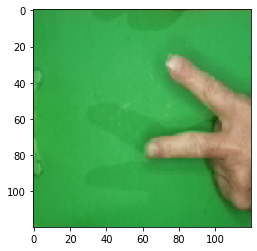

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # Memprediksi gambar 
  path = fn
  img = image.load_img(path, target_size=(120,120))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  result = np.argmax(classes)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==0:
    print('scissors')
  else:
    print('rock')
  